## Check environment

In [1]:
import os

In [2]:
!nvidia-smi

HOST_path = "/root"
PROJECT_path = os.path.join(HOST_path, "IDB_3d_printing")
SAVE_path = os.path.join(PROJECT_path, "outputs")

Thu Dec 14 09:44:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:31:00.0 Off |                  Off |
| 30%   27C    P8    11W / 450W |      2MiB / 24564MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Import signal data

In [3]:
import librosa
import numpy as np

In [4]:
def read_allFile(signal_path):
    signal_value, signal_rate = librosa.load(signal_path, sr=None, mono=True, offset=0.0, duration=None)
    print("signal_shape:", signal_value.shape, "sampling_rate:", signal_rate, "time:", len(signal_value)/signal_rate, "s")
    # if signal_rate != RATE:
    #     signal_value = librosa.resample(signal_value, orig_sr=signal_rate, target_sr=RATE)
    max_value = np.max(np.abs(signal_value))
    signal_value_normalized = signal_value / max_value
    return signal_value_normalized

In [5]:
S221 = read_allFile(os.path.join(HOST_path, "IDB_3d_printing/datasets/SIGNAL/2023-11-14 15.06.13-extra-22-1.wav"))
S220 = read_allFile(os.path.join(HOST_path, "IDB_3d_printing/datasets/SIGNAL/2023-11-14 15.10.46-extra-22-0.wav"))
S231 = read_allFile(os.path.join(HOST_path, "IDB_3d_printing/datasets/SIGNAL/2023-11-14 15.24.04-extra-23-1.wav"))
S230 = read_allFile(os.path.join(HOST_path, "IDB_3d_printing/datasets/SIGNAL/2023-11-14 15.28.02-extra-23-0.wav"))
S241 = read_allFile(os.path.join(HOST_path, "IDB_3d_printing/datasets/SIGNAL/2023-11-14 15.34.12-extra-24-1.wav"))
S240 = read_allFile(os.path.join(HOST_path, "IDB_3d_printing/datasets/SIGNAL/2023-11-14 15.37.43-extra-24-0.wav"))

signal_shape: (3248640,) sampling_rate: 48000 time: 67.68 s
signal_shape: (3048960,) sampling_rate: 48000 time: 63.52 s
signal_shape: (2957824,) sampling_rate: 48000 time: 61.62133333333333 s
signal_shape: (3238912,) sampling_rate: 48000 time: 67.47733333333333 s
signal_shape: (3141120,) sampling_rate: 48000 time: 65.44 s
signal_shape: (2904832,) sampling_rate: 48000 time: 60.51733333333333 s


In [6]:
RATE = 48000

In [7]:
S221 = S221[10*RATE:50*RATE]
S220 = S220[10*RATE:50*RATE]
S231 = S231[10*RATE:50*RATE]
S230 = S230[10*RATE:50*RATE]
S241 = S241[10*RATE:50*RATE]
S240 = S240[10*RATE:50*RATE]

In [8]:
signals_list = ["S221", "S220", "S231", "S230", "S241", "S240"]

def check_all():
    for signals in signals_list:
        print(signals, eval(signals).shape)
check_all()

S221 (1920000,)
S220 (1920000,)
S231 (1920000,)
S230 (1920000,)
S241 (1920000,)
S240 (1920000,)


## Signals preview

In [9]:
import matplotlib.pyplot as plt

In [10]:
def displayWaveform(signal, rate):
  plt.figure(figsize=(20,6))
  max = np.max(np.absolute(signal))*1.2
  time = np.arange(0, len(SIGNAL)) / RATE
  plt.plot(time, signal)
  plt.title("Time domain waveform of speech signal")
  plt.xlabel("time (s)")
  plt.ylabel("amplitude")
  plt.xlim(0,len(SIGNAL)/RATE)
  ymin, ymax = plt.ylim()
  ylim = np.maximum(np.abs(ymin), np.abs(ymax))
  plt.ylim(-ylim, ylim)

def displaySpectrum(signal, rate):
  plt.figure(figsize=(20,6)) 
  s = np.fft.fft(signal)
  m = np.abs(s)
  n = len(signal)
  f = np.fft.fftfreq(n, 1/rate)
  plt.plot(f[:n//2],m[:n//2])
  plt.title("Frequency domain spectral line of speech signal")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("amplitude")
  plt.xlim(0, rate//2)

def displaySpectrogram(signal, rate, fftlen):    
  plt.figure(figsize=(8,6))
  plt.specgram(signal, NFFT=fftlen, Fs=rate, noverlap=int(fftlen*0.25), window=np.hanning(fftlen))
  plt.title('Linear-frequency power spectrogram')
  plt.xlabel('time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.colorbar(format="%+2.0f dB")
    
def displayMelspectrogram(signal, rate):
  plt.figure(figsize=(8,6))
  # melspectrogram = librosa.feature.melspectrogram(y=signal, sr=rate)
  D = np.abs(librosa.stft(signal))**2
  S = librosa.feature.melspectrogram(S=D, sr=rate)
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, sr=rate, fmax=rate/2, x_axis='time', y_axis='mel') 
  plt.title('Mel-frequency spectrogram')
  plt.colorbar(format='%+2.0f dB')

def diaplayMFCC(signal, rate):
  plt.figure(figsize=(8,6))
  mfccs = librosa.feature.mfcc(y=signal, sr=rate)
  librosa.display.specshow(mfccs, sr=rate, x_axis='time')
  plt.colorbar(format='%+2.0f dB')

def displayZCR(signal, rate):
  plt.figure(figsize=(8,3))
  zcrs = librosa.feature.zero_crossing_rate(signal)  
  plt.plot(zcrs[0])

def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

def displayCentroids(signal, rate):
  cent = librosa.feature.spectral_centroid(y=signal, sr=rate) 
  S, phase = librosa.magphase(librosa.stft(y=signal))
  S_db = librosa.amplitude_to_db(S, ref=np.max)
  librosa.feature.spectral_centroid(S=S)
  freqs, times, D = librosa.reassigned_spectrogram(signal, fill_nan=True)
  librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)
  times = librosa.times_like(cent)
  fig, ax = plt.subplots(nrows=2, sharex=True)
  ax[0].semilogy(times, cent[0], label='Spectral centroid')
  ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
  ax[0].legend()
  ax[0].label_outer()
  librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[1])
  ax[1].plot(times, cent.T, label='Spectral centroid', color='w')
  ax[1].set(title='log Power spectrogram')
  ax[1].legend(loc='lower right')

def displayBandwidth(signal, rate):
  spec_bw = librosa.feature.spectral_bandwidth(y=signal, sr=rate)
  S, phase = librosa.magphase(librosa.stft(y=signal))
  S_db = librosa.amplitude_to_db(S, ref=np.max)
  librosa.feature.spectral_bandwidth(S=S)
  freqs, times, D = librosa.reassigned_spectrogram(signal, fill_nan=True)
  librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)
  times = librosa.times_like(spec_bw)
  centroid = librosa.feature.spectral_centroid(S=S)
  fig, ax = plt.subplots(nrows=2, sharex=True)
  ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
  ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
  ax[0].legend()
  ax[0].label_outer()
  librosa.display.specshow(S_db, y_axis='log', x_axis='time', ax=ax[1])
  ax[1].set(title='log Power spectrogram')
  ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]), np.minimum(centroid[0] + spec_bw[0], rate/2), alpha=0.5, label='Centroid +- bandwidth')
  ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
  ax[1].legend(loc='lower right')

def displayRolloff(signal, rate):
  librosa.feature.spectral_rolloff(y=signal, sr=rate)
  rolloff = librosa.feature.spectral_rolloff(y=signal, sr=rate, roll_percent=0.99)
  rolloff_min = librosa.feature.spectral_rolloff(y=signal, sr=rate, roll_percent=0.01)
  S, phase = librosa.magphase(librosa.stft(signal))
  S_db = librosa.amplitude_to_db(S, ref=np.max)
  librosa.feature.spectral_rolloff(S=S, sr=rate)
  librosa.feature.spectral_rolloff(y=signal, sr=rate, roll_percent=0.95)
  fig, ax = plt.subplots()
  librosa.display.specshow(S_db, y_axis='log', x_axis='time', ax=ax)
  ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
  ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w', label='Roll-off frequency (0.01)')
  ax.legend(loc='lower right')
  ax.set(title='log Power spectrogram')

def displayChromastft(signal, rate, fftlen):
  S = np.abs(librosa.stft(signal))
  chroma = librosa.feature.chroma_stft(S=S, sr=rate)
  S = np.abs(librosa.stft(signal, n_fft=fftlen))**2
  S_db = librosa.amplitude_to_db(S, ref=np.max)
  chroma = librosa.feature.chroma_stft(S=S, sr=rate)
  fig, ax = plt.subplots(nrows=2, sharex=True)
  img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])
  fig.colorbar(img, ax=[ax[0]])
  ax[0].label_outer()
  img = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', ax=ax[1])
  fig.colorbar(img, ax=[ax[1]])

def displayChromacqt(signal, rate, n_chroma, n_fft):
  chroma_stft = librosa.feature.chroma_stft(y=signal, sr=rate, n_chroma=n_chroma, n_fft=n_fft)
  chroma_cq = librosa.feature.chroma_cqt(y=signal, sr=rate)
  fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
  img1 = librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', ax=ax[0])
  ax[0].set(title='chroma_stft')
  ax[0].label_outer()
  img2 = librosa.display.specshow(chroma_cq, x_axis='time', y_axis='chroma', ax=ax[1])
  ax[1].set(title='chroma_cqt')
  fig.colorbar(img2, ax=ax)

def displayChromacens(signal, rate):
  chroma_cens = librosa.feature.chroma_cens(y=signal, sr=rate)
  chroma_cq = librosa.feature.chroma_cqt(y=signal, sr=rate)
  fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
  img1 = librosa.display.specshow(chroma_cq, x_axis='time', y_axis='chroma', ax=ax[0])
  ax[0].set(title='chroma_cq')
  ax[0].label_outer()
  img2 = librosa.display.specshow(chroma_cens, x_axis='time', y_axis='chroma', ax=ax[1])
  ax[1].set(title='chroma_cens')
  fig.colorbar(img1, ax=ax)

def displayChromavqt(signal, rate, n_bins):
  chroma_cq = librosa.feature.chroma_cqt(y=signal, sr=rate, n_chroma=n_bins)
  chroma_vq = librosa.feature.chroma_vqt(y=signal, sr=rate, intervals='ji5', bins_per_octave=n_bins)
  fig, ax = plt.subplots(nrows=2, sharex=True)
  img1 = librosa.display.specshow(chroma_cq, x_axis='time', y_axis='chroma', ax=ax[0], bins_per_octave=n_bins)
  ax[0].set(ylabel='chroma_cqt')
  ax[0].label_outer()
  img2 = librosa.display.specshow(chroma_vq, y_axis='chroma_fjs', x_axis='time', ax=ax[1], bins_per_octave=n_bins, intervals='ji5')
  ax[1].set(ylabel='chroma_vqt')
  fig.colorbar(img2, ax=ax)

def plot_wave(signal, rate):  
  displayWaveform(signal, rate)
  displaySpectrum(signal, rate)
  displaySpectrogram(signal, rate, fftlen=512)
  displayMelspectrogram(signal, rate)
  diaplayMFCC(signal, rate)
#   displayZCR(signal, rate)
#   displayCentroids(signal, rate)
#   displayBandwidth(signal, rate)
#   displayRolloff(signal, rate)
#   displayChromastft(signal, rate, fftlen=512)
#   displayChromacqt(signal, rate, n_chroma=12, n_fft=512)
#   displayChromacens(signal, rate)
#   displayChromavqt(signal, rate, n_bins=24)

In [11]:
import IPython

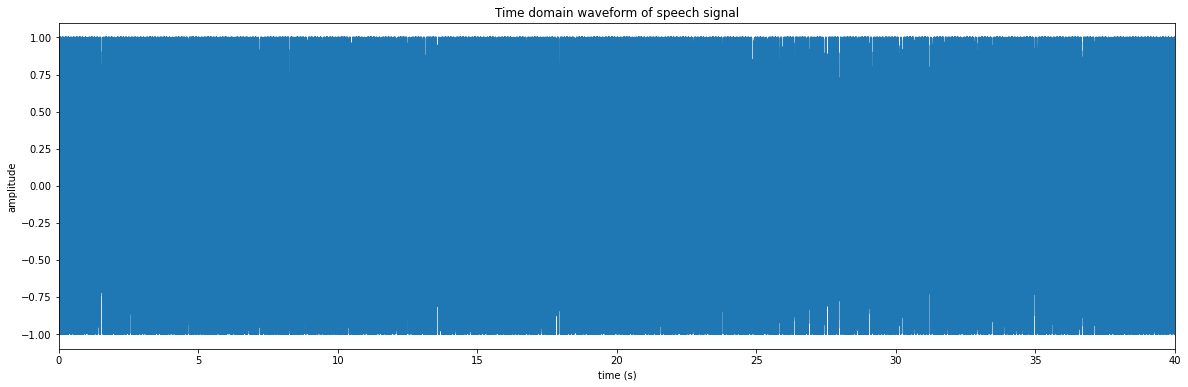

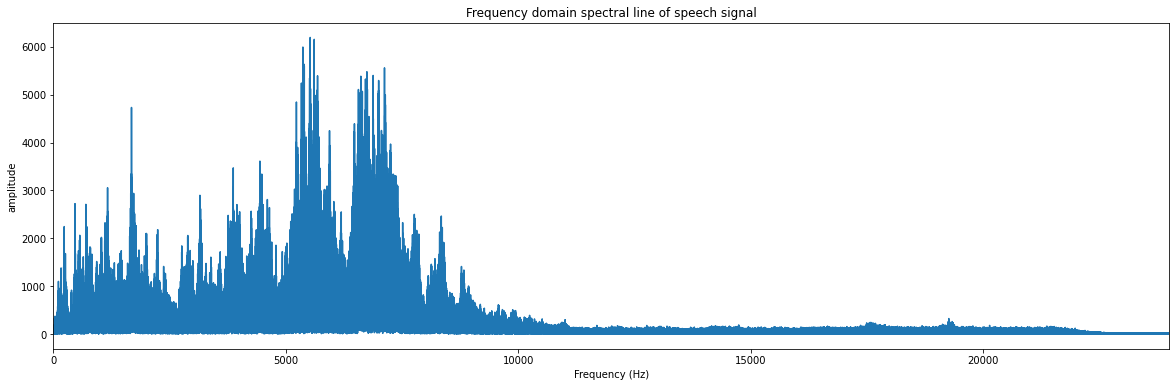

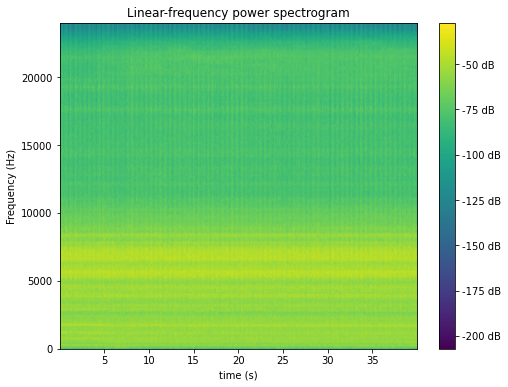

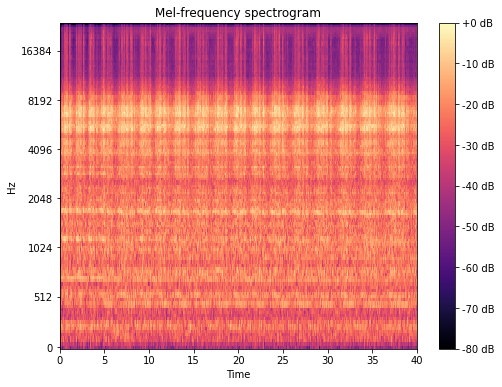

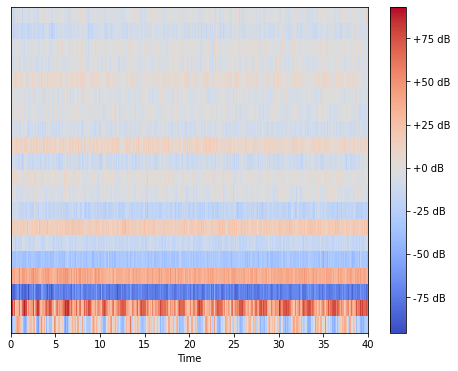

In [12]:
SIGNAL = S221
plot_wave(SIGNAL, RATE)
IPython.display.Audio(data=SIGNAL, rate=RATE)

## Cut signals

In [13]:
from tqdm import tqdm

In [14]:
def cut_signal(signals):
  sample_size = int(RATE*2)
  sample_step = int(RATE/10)
  sample_data = []
  for i in tqdm(range((len(signals)-sample_size) // sample_step)):
    sample_data.append(signals[i*sample_step : (i*sample_step+sample_size)])
  sample_data = np.stack(sample_data)
  sample_data = np.squeeze(sample_data)
  return sample_data

In [15]:
S221 = cut_signal(S221)
S220 = cut_signal(S220)
S231 = cut_signal(S231)
S230 = cut_signal(S230)
S241 = cut_signal(S241)
S240 = cut_signal(S240)

100%|██████████| 380/380 [00:00<00:00, 1371631.26it/s]


In [16]:
check_all()

S221 (380, 96000)
S220 (380, 96000)
S231 (380, 96000)
S230 (380, 96000)
S241 (380, 96000)
S240 (380, 96000)


## Convert signals

In [17]:
from pyts.image import RecurrencePlot, MarkovTransitionField, GramianAngularField

In [18]:
# 1D original
def wave2wave(X, show):
    if show==1:
        print("waveform: ", X.shape)
    return X

# 1D spectrum
def wave2spectrum(X, show):
    spectrum = np.abs(np.fft.fft(X))
    spectrum = spectrum[0:len(spectrum)//2]
    if show==1:
        print("spectrum: ", spectrum.shape)
    return spectrum

# 2D spectrogram
def wave2spectrogram(X, show):
    spectrogram = np.abs(librosa.stft(X))
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    if show==1:
        print("spectrogram_db: ", spectrogram_db.shape)
    return spectrogram_db

# 2D mfcc
def wave2mfcc(X, show):
    mfccs = librosa.feature.mfcc(y=X, sr=RATE)
    if show==1:
         print("mfccs: ", mfccs.shape)
    return mfccs

# 2D ptp
def wave2ptp(X, show):
    autocorr = np.correlate(X, X, mode='full')
    time_delay = np.argmax(autocorr[len(autocorr)//2:]) + 1
    embedding = np.array([X[:-2*time_delay], X[time_delay:-time_delay]]).T
    if show==1:
        plt.scatter(embedding[:, 0], embedding[:, 1])
        plt.title('Phase Trajectory Plot')
        plt.show()
    return embedding

# 2D urp
def wave2urp(X, show):
    urp = RecurrencePlot(threshold=None)
    X_urp = urp.fit_transform(X.reshape(1, -1))[0]
    if show==1:
        plt.imshow(X_urp, cmap='rainbow', origin='lower')
        plt.title('Unthresholded Recurrence Plot')
        plt.colorbar(label='Intensity', fraction=0.0457, pad=0.04)
        plt.tight_layout()
        plt.show()
    return X_urp

# 2D rp
def wave2rp(X, show):
    rp = RecurrencePlot(threshold='point', percentage=20)
    X_rp = rp.fit_transform(X.reshape(1, -1))[0]
    if show==1:
        plt.imshow(X_rp, cmap='binary', origin='lower')
        plt.title('Recurrence Plot')
        plt.colorbar(label='Intensity', fraction=0.0457, pad=0.04)
        plt.tight_layout()
        plt.show()
    return X_rp

#2D mtf
def wave2mtf(X, show):
    mtf = MarkovTransitionField(image_size=227)
    X_mtf = mtf.fit_transform(X.reshape(1, -1))[0]
    if show==1:
        plt.imshow(X_mtf, cmap='rainbow', origin='lower')
        plt.title('Markov Transition Field')
        plt.colorbar(label='Intensity', fraction=0.0457, pad=0.04)
        plt.tight_layout()
        plt.show()
    return X_mtf

# 2D ga(s)f
def wave2gasf(X, show):
    gasf = GramianAngularField(image_size=227, method='summation')
    X_gasf = gasf.fit_transform(X.reshape(1, -1))[0]
    if show==1:
        plt.imshow(X_gasf, cmap='rainbow', origin='lower')
        plt.title('Gramian Angular Summation Fields')
        plt.colorbar(label='Intensity', fraction=0.0457, pad=0.04)
        plt.tight_layout()
        plt.show()
    return X_gasf

# 2D ga(d)f
def wave2gadf(X, show):
    gadf = GramianAngularField(image_size=227, method='difference')
    X_gadf = gadf.fit_transform(X.reshape(1, -1))[0]
    if show==1:
        plt.imshow(X_gadf, cmap='rainbow', origin='lower')
        plt.title('Gramian Angular Difference Fields')
        plt.colorbar(label='Intensity', fraction=0.0457, pad=0.04)
        plt.tight_layout()
        plt.show()
    return X_gadf

In [19]:
SIGNAL = S221[0]
print("signal shape: ", SIGNAL.shape)
wave2wave(SIGNAL, 1)
wave2spectrum(SIGNAL, 1)
wave2spectrogram(SIGNAL, 1)
wave2mfcc(SIGNAL, 1)
# wave2ptp(SIGNAL, 1)
# wave2urp(SIGNAL, 1)
# wave2rp(SIGNAL, 1)
# wave2mtf(SIGNAL, 1)
# wave2gasf(SIGNAL, 1)
# wave2gadf(SIGNAL, 1)

signal shape:  (96000,)
waveform:  (96000,)
spectrum:  (48000,)
spectrogram_db:  (1025, 188)
mfccs:  (20, 188)


array([[-2.5198549e+01,  1.2722792e+01,  1.2018088e+01, ...,
        -2.3171574e+01,  8.4308729e+00,  1.9597057e+01],
       [ 6.3464985e+01,  5.4957455e+01,  5.5601921e+01, ...,
         7.7013748e+01,  5.4676983e+01,  5.0310059e+01],
       [-7.2999413e+01, -7.9675407e+01, -8.0750229e+01, ...,
        -9.5733536e+01, -9.3350502e+01, -7.8708939e+01],
       ...,
       [-6.1504083e+00, -2.7916584e+00, -3.4074080e+00, ...,
        -1.4969282e+00, -7.7366858e+00,  7.5577497e-03],
       [-1.6630028e+01, -1.6582472e+01, -1.5615419e+01, ...,
        -1.3199251e+01, -1.9398876e+01, -1.3668903e+01],
       [-1.2229349e+01, -4.9284153e+00,  2.6250496e+00, ...,
        -7.1183729e+00, -8.8300343e+00, -3.8589659e+00]], dtype=float32)

signal shape:  (227,)
waveform:  (227,)
spectrum:  (113,)
spectrogram_db:  (1025, 1)
mfccs:  (20, 1)


/root/miniconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=227
  warnings.warn(


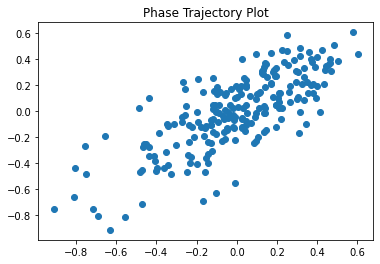

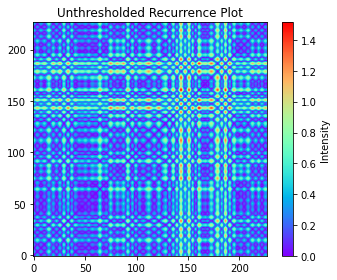

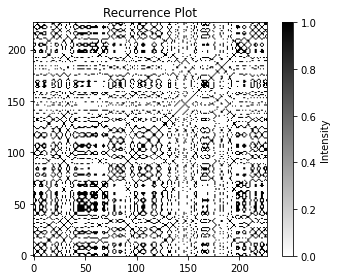

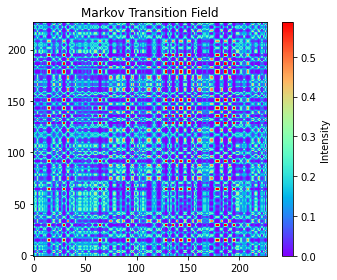

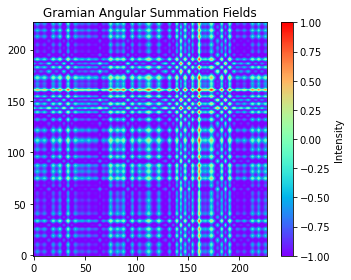

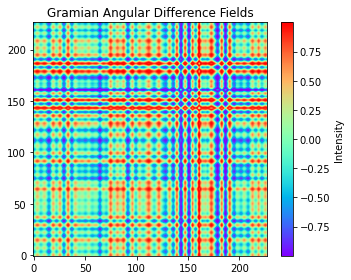

array([[ 0.        ,  0.04638601,  0.21838869, ...,  0.46176248,
         0.55807985,  0.44886641],
       [-0.04638601,  0.        ,  0.17288727, ...,  0.42012087,
         0.51898861,  0.40693276],
       [-0.21838869, -0.17288727,  0.        , ...,  0.25690484,
         0.3633927 ,  0.24287972],
       ...,
       [-0.46176248, -0.42012087, -0.25690484, ...,  0.        ,
         0.11185423, -0.01448431],
       [-0.55807985, -0.51898861, -0.3633927 , ..., -0.11185423,
         0.        , -0.12623591],
       [-0.44886641, -0.40693276, -0.24287972, ...,  0.01448431,
         0.12623591,  0.        ]])

In [20]:
SIGNAL = S221[0][0:227]
print("signal shape: ", SIGNAL.shape)
wave2wave(SIGNAL, 1)
wave2spectrum(SIGNAL, 1)
wave2spectrogram(SIGNAL, 1)
wave2mfcc(SIGNAL, 1)
wave2ptp(SIGNAL, 1)
wave2urp(SIGNAL, 1)
wave2rp(SIGNAL, 1)
wave2mtf(SIGNAL, 1)
wave2gasf(SIGNAL, 1)
wave2gadf(SIGNAL, 1)

In [23]:
def wave2others(signals):
    function = wave2spectrum
    results = []
    if function == wave2rp or function == wave2urp:
        random.seed(42)
        shorter_length = 227
        for signal in tqdm(signals):
            shorter_arrays = [signal[i:i+shorter_length] for i in range(len(signal) - shorter_length + 1)]
            signal = random.choice(shorter_arrays)
            result = wave2spectrum(signal, 0)
            result = function(signal, 0)
            results.append(result)
    else:
        for signal in tqdm(signals):
            result = wave2spectrum(signal, 0)
            result = function(signal, 0)
            results.append(result)
    results = np.array(results)
    return results

In [24]:
S221 = wave2others(S221)
S220 = wave2others(S220)
S231 = wave2others(S231)
S230 = wave2others(S230)
S241 = wave2others(S241)
S240 = wave2others(S240)

100%|██████████| 380/380 [00:01<00:00, 225.44it/s]


In [25]:
check_all()

S221 (380, 48000)
S220 (380, 48000)
S231 (380, 48000)
S230 (380, 48000)
S241 (380, 48000)
S240 (380, 48000)


## Build datasets

In [30]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

2023-12-14 09:57:40.942352: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [31]:
X_0 = np.concatenate((S220, S230, S240), axis=0)
X_1 = np.concatenate((S221, S231, S241), axis=0)
Y_0 = np.repeat(0, len(X_0))
Y_1 = np.repeat(1, len(X_1))
X_set = np.concatenate((X_0, X_1), axis=0)
Y_set = np.concatenate((Y_0, Y_1), axis=0)
num_classes = len(np.unique(Y_set))

print("num_classes:", num_classes)
print(type(X_0), X_0.shape)
print(type(Y_0), Y_0.shape)
print(type(X_1), X_1.shape)
print(type(Y_1), Y_1.shape)
print(type(X_set), X_set.shape)
print(type(Y_set), Y_set.shape)

num_classes: 2
<class 'numpy.ndarray'> (1140, 48000)
<class 'numpy.ndarray'> (1140,)
<class 'numpy.ndarray'> (1140, 48000)
<class 'numpy.ndarray'> (1140,)
<class 'numpy.ndarray'> (2280, 48000)
<class 'numpy.ndarray'> (2280,)


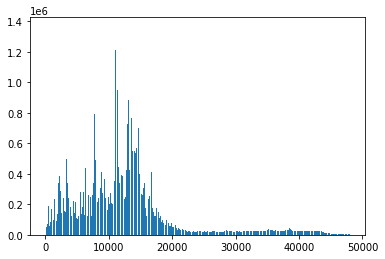

In [27]:
def distributionOf(arr):
    Freq = np.sum(arr, axis=0)
    plt.bar(np.arange(arr.shape[1]), Freq)
    plt.show()

distributionOf(X_set)

### ML

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X_set, Y_set, test_size=0.2, random_state=42)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)  
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (1824, 48000)
y_train: (1824,)
x_test: (456, 48000)
y_test: (456,)


In [42]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
def make_knn():
    model = KNeighborsClassifier(n_neighbors=num_classes) 
    model.fit(x_train, y_train)
    return model

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
def make_dtc():
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    return model

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
def make_rfc():
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    return model

# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
def make_nbc():
    model = GaussianNB()
    model.fit(x_train, y_train)
    return model

In [43]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [44]:
time0 = time.time()
model = make_rfc()
time1 = time.time()
y_pred = model.predict(x_test)
time2 = time.time()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
time3 = time.time()

print("Train time:", time1-time0)
print("Predict time:", time2-time1)
print("Process time:", time3-time2)
print("Function time:", time3-time1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report)
print("\nConfusion Matrix:\n", confusion_matrix)

Train time: 31.23651123046875
Predict time: 0.06870222091674805
Process time: 0.010254621505737305
Function time: 0.07895684242248535
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       222

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456


Confusion Matrix:
 [[234   0]
 [  0 222]]


### DL

In [45]:
X_set = np.expand_dims(X_set, axis=-1)
Y_set = to_categorical(Y_set, num_classes=num_classes)

x_train, x_test, y_train, y_test = train_test_split(X_set, Y_set, test_size=0.2, random_state=42)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)  
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (1824, 48000, 1)
y_train: (1824, 2)
x_test: (456, 48000, 1)
y_test: (456, 2)


In [61]:
import keras
from keras.layers import Activation, BatchNormalization, Concatenate, Conv1D, Conv2D, Dense, Dropout, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalAveragePooling2D, Input, MaxPooling1D, MaxPooling2D
from keras.models import load_model, Model, Sequential

In [71]:
def make_1Dgap():
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape=x_train.shape[1:]))
    model.add(MaxPooling1D(2))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def make_1Dgap2():
    model = Sequential()
    model.add(Conv1D(64, 7, strides=2, activation='relu', padding='same', input_shape=x_train.shape[1:]))
    model.add(MaxPooling1D(3, strides=2, padding='same'))
    model.add(Conv1D(32, 3, activation='relu', padding='same'))
    model.add(Conv1D(32, 3, activation='relu', padding='same'))
    model.add(Conv1D(32, 3, activation='relu', padding='same'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def make_1Dalex():
    model = Sequential()
    model.add(Conv1D(96, 11, strides=4, activation='relu', input_shape=x_train.shape[1:]))  # (227, 1)
    model.add(MaxPooling1D(pool_size=3, strides=2))
    model.add(Conv1D(256, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=3, strides=2))
    model.add(Conv1D(384, 3, activation='relu'))
    model.add(Conv1D(384, 3, activation='relu'))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=3, strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def make_1Dvgg():
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape=x_train.shape[1:]))
    model.add(Conv1D(64, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(128, 3, activation='relu', padding='same'))
    model.add(Conv1D(128, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(256, 3, activation='relu', padding='same'))
    model.add(Conv1D(256, 3, activation='relu', padding='same'))
    model.add(Conv1D(256, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(512, 3, activation='relu', padding='same'))
    model.add(Conv1D(512, 3, activation='relu', padding='same'))
    model.add(Conv1D(512, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(512, 3, activation='relu', padding='same'))
    model.add(Conv1D(512, 3, activation='relu', padding='same'))
    model.add(Conv1D(512, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  
    return model


def make_2Dgap():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def make_2Dgap2():
    model = Sequential()
    model.add(Conv2D(64, (7, 7), strides=(2, 2), activation='relu', padding='same', input_shape=x_train.shape[1:]))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def make_2Dalex():
    model = Sequential()
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=x_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(256, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(384, (3, 3), activation='relu'))
    model.add(Conv2D(384, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  
    return model

def make_2Dvgg():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [72]:
model = make_1Dgap2()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_35 (Conv1D)          (None, 24000, 64)         512       
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 12000, 64)        0         
 g1D)                                                            
                                                                 
 conv1d_36 (Conv1D)          (None, 12000, 32)         6176      
                                                                 
 conv1d_37 (Conv1D)          (None, 12000, 32)         3104      
                                                                 
 conv1d_38 (Conv1D)          (None, 12000, 32)         3104      
                                                                 
 global_average_pooling1d_2   (None, 32)               0         
 (GlobalAveragePooling1D)                             

In [73]:
model.compile(optimizer='adam',                # tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
              loss='binary_crossentropy',      # loss='categorical_crossentropy'
              metrics=['accuracy',
                       keras.metrics.AUC(),
                       keras.metrics.Precision(),
                       keras.metrics.Recall()])

callbacks = [
             keras.callbacks.ModelCheckpoint(os.path.join(SAVE_path, "best_model.hdf5"),
                                             monitor="loss",
                                             mode="min",
                                             save_best_only=True),
             # keras.callbacks.EarlyStopping(monitor="val_loss",
             #                               mode="min",
             #                               verbose=1,
             #                               patience=10,
             #                               restore_best_weights=True), 
             keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                               factor=0.2,
                                               patience=2,
                                               min_lr=0.000001),
            ]

history = model.fit(x_train, y_train,
                    validation_split=0.2, 
                    epochs=200, 
                    batch_size=32, 
                    callbacks=callbacks, 
                    shuffle=True)

Epoch 1/200
46/46 [==============================] - 3s 36ms/step - loss: 0.7080 - accuracy: 0.4866 - auc_3: 0.4816 - precision_3: 0.4866 - recall_3: 0.4866 - val_loss: 0.6930 - val_accuracy: 0.5315 - val_auc_3: 0.5085 - val_precision_3: 0.5315 - val_recall_3: 0.5315 - lr: 0.0010
Epoch 2/200
46/46 [==============================] - 1s 22ms/step - loss: 0.6936 - accuracy: 0.4928 - auc_3: 0.4892 - precision_3: 0.4928 - recall_3: 0.4928 - val_loss: 0.6980 - val_accuracy: 0.4685 - val_auc_3: 0.5810 - val_precision_3: 0.4685 - val_recall_3: 0.4685 - lr: 0.0010
Epoch 3/200
46/46 [==============================] - 1s 27ms/step - loss: 0.6931 - accuracy: 0.5072 - auc_3: 0.5146 - precision_3: 0.5072 - recall_3: 0.5072 - val_loss: 0.6919 - val_accuracy: 0.5315 - val_auc_3: 0.5319 - val_precision_3: 0.5315 - val_recall_3: 0.5315 - lr: 0.0010
Epoch 4/200
46/46 [==============================] - 1s 29ms/step - loss: 0.6936 - accuracy: 0.4942 - auc_3: 0.4916 - precision_3: 0.4942 - recall_3: 0.4942 

KeyboardInterrupt: 

In [ ]:
y_test_true = np.argmax(y_test, axis=1)
y_test_pred = np.argmax(model.predict(x_test), axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
precision = precision_score(y_test_true, y_test_pred, average='weighted')
recall = recall_score(y_test_true, y_test_pred, average='weighted')
f1 = f1_score(y_test_true, y_test_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

### Confusion matrix

In [ ]:
import seaborn as sns

In [ ]:
# Define the confusion matrix array
# confusion_matrix = np.array([[1181,    0,    0],
#                              [   0, 1243,    0],
#                              [   0,    0, 1224]])
confusion_matrix = confusion_matrix

In [ ]:
fig, ax = plt.subplots()

annot_font_family = 'Times New Roman'
annot_font_weight = 'bold'
annot_font_size = 18

sns.heatmap(confusion_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Oranges', 
            cbar=False, 
            square=True,
            xticklabels=False, 
            yticklabels=False,
            annot_kws={'fontsize': annot_font_size,
                       'fontweight': annot_font_weight},
            ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()
# plt.savefig('cm.png', dpi=300)